<a href="https://colab.research.google.com/github/aframuneer26/Deep_Learning_Experiments/blob/main/DL_EXPT6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

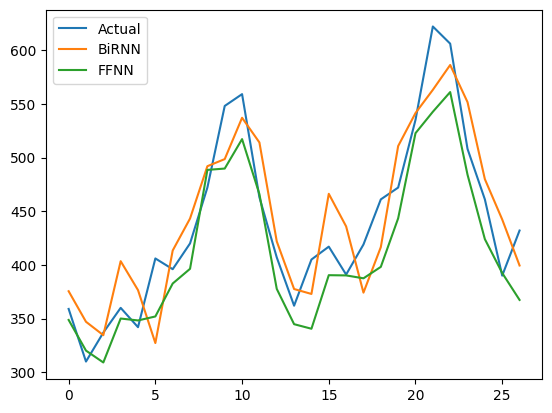

MSE BiRNN: 1446.9955719805012  MSE FFNN: 1355.8282835710138


In [ ]:
import pandas as pd, numpy as np, torch, torch.nn as nn, matplotlib.pyplot as plt
from torch.utils.data import DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler; from sklearn.metrics import mean_squared_error

# Data
data=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",usecols=[1]).values.astype('f')
scaler=MinMaxScaler(); data=scaler.fit_transform(data); SEQ=10
X=np.array([data[i:i+SEQ] for i in range(len(data)-SEQ)]); y=np.array([data[i+SEQ] for i in range(len(data)-SEQ)])
s=int(len(X)*.8); Xtr,Xte,ytr,yte=map(torch.tensor,[X[:s],X[s:],y[:s],y[s:]])
train_loader=DataLoader(TensorDataset(Xtr,ytr),16,True)

# Models
class BiRNN(nn.Module):
  def __init__(s): super().__init__(); s.r,s.f=nn.RNN(1,64,batch_first=True,bidirectional=True),nn.Linear(128,1)
  def forward(s,x): return s.f(s.r(x)[0][:,-1])
class FFNN(nn.Module):
  def __init__(s): super().__init__(); s.n=nn.Sequential(nn.Linear(SEQ,64),nn.ReLU(),nn.Linear(64,1))
  def forward(s,x): return s.n(x.view(x.size(0),-1))

def run(m):
  opt,loss=torch.optim.Adam(m.parameters(),0.01),nn.MSELoss()
  for _ in range(100):
    for xb,yb in train_loader: opt.zero_grad(); loss(m(xb),yb).backward(); opt.step()
  return m(Xte).detach().numpy()

# Run & Plot
pb,pf=run(BiRNN()),run(FFNN()); y=scaler.inverse_transform(yte); pb,pf=scaler.inverse_transform(pb),scaler.inverse_transform(pf)
plt.plot(y,label="Actual"); plt.plot(pb,label="BiRNN"); plt.plot(pf,label="FFNN"); plt.legend(); plt.show()
print("MSE BiRNN:",mean_squared_error(y,pb)," MSE FFNN:",mean_squared_error(y,pf))
